In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.optimize import least_squares
import pandas as pd
import glob

In [10]:
df = pd.read_feather("combined_all_lambda_data.feather")
df

,event,lam_id,lam_pdg,lam_gen,lam_sim,lam_px,lam_py,lam_pz,lam_vx,lam_vy,...,gamtwo_py,gamtwo_pz,gamtwo_vx,gamtwo_vy,gamtwo_vz,gamtwo_epx,gamtwo_epy,gamtwo_epz,gamtwo_time,gamtwo_nd
0,0,4,3122,1,134217728,-0.481806,0.667223,22.881677,-0.065840,-0.008148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4,3122,1,134217728,-0.139277,0.062614,31.113912,-0.067507,0.000640,...,0.082274,3.843211,-4.236915,1.875058,940.263365,-182.985431,130.331637,6940.804748,3.073184,0.0
2,2,4,3122,1,134217728,-1.666138,0.211775,30.953969,-0.027048,0.006753,...,-0.035283,2.576297,-16.709645,2.127195,331.802817,-236.338462,-40.261238,3426.886648,0.948990,0.0
3,3,4,3122,1,134217728,-0.047907,0.293727,20.976907,0.073658,-0.005835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,3122,1,134217728,-0.728119,-0.635623,31.608930,-0.042067,0.001390,...,-0.015382,1.622836,-39.878694,-34.774637,1675.921870,-96.233964,-84.811255,6954.767017,5.966232,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563784,499995,4,3122,1,134217728,-0.009053,-0.654791,26.745864,-0.101977,-0.012837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563785,499996,4,3122,1,134217728,-0.884341,-0.615085,37.018614,-0.011745,-0.024622,...,0.054056,4.083450,-3.373053,-2.362499,184.886373,-227.016039,87.304909,6958.468336,0.329498,0.0
563786,499997,4,3122,1,134217728,-1.299756,-0.123300,25.804004,0.224168,-0.014203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563787,499998,4,3122,1,134217728,-0.165018,-0.626539,24.329761,-0.050402,0.038077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


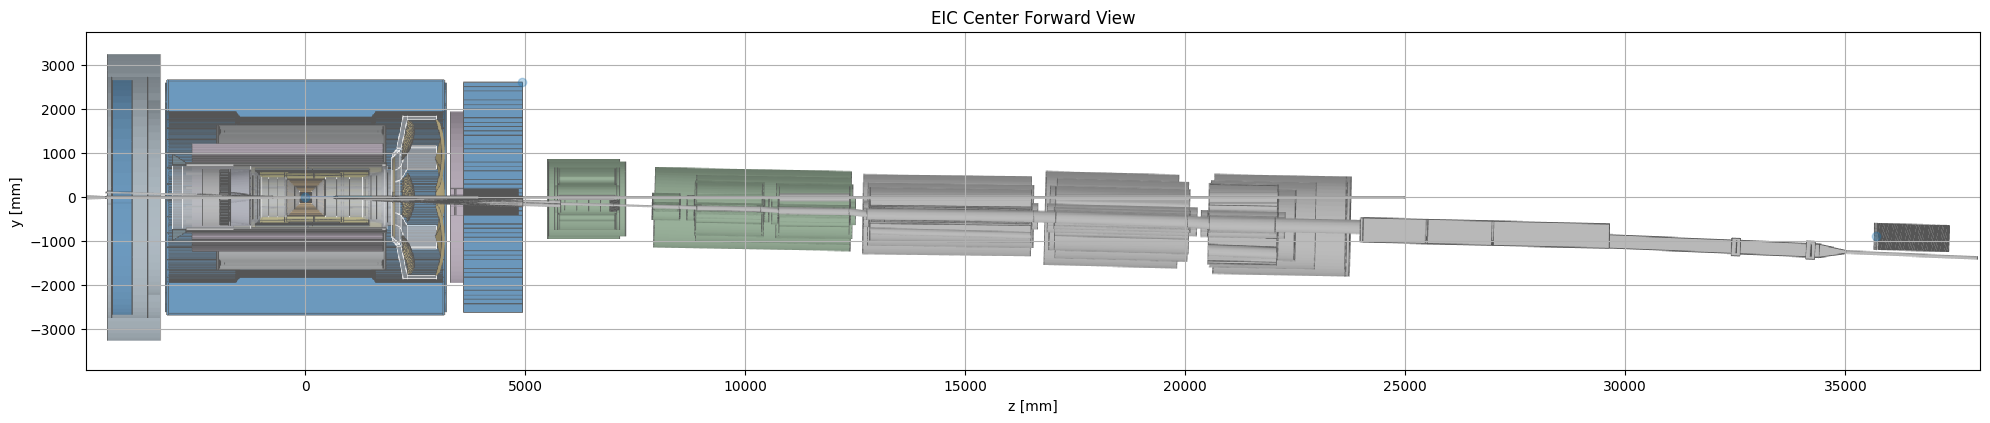

In [6]:
from aa_helpers import create_plot_with_background

fig, ax = create_plot_with_background()
x_axis = [0, 4937, 35690]
y_axis = [0, 2622, -878]


# Optional: overlay the reference points to verify alignment
ax.plot(x_axis, y_axis, marker="o", linestyle="none", alpha=0.3)

ax.set_xlabel("z [mm]")
ax.set_ylabel("y [mm]")
ax.set_aspect("equal", adjustable="box")
ax.grid(True)

# Uncomment to lock the view to the image bounds:
# ax.set_xlim(min(left_mm, right_mm), max(left_mm, right_mm))
# ax.set_ylim(min(bottom_mm, top_mm), max(bottom_mm, top_mm))

plt.tight_layout()
plt.show()



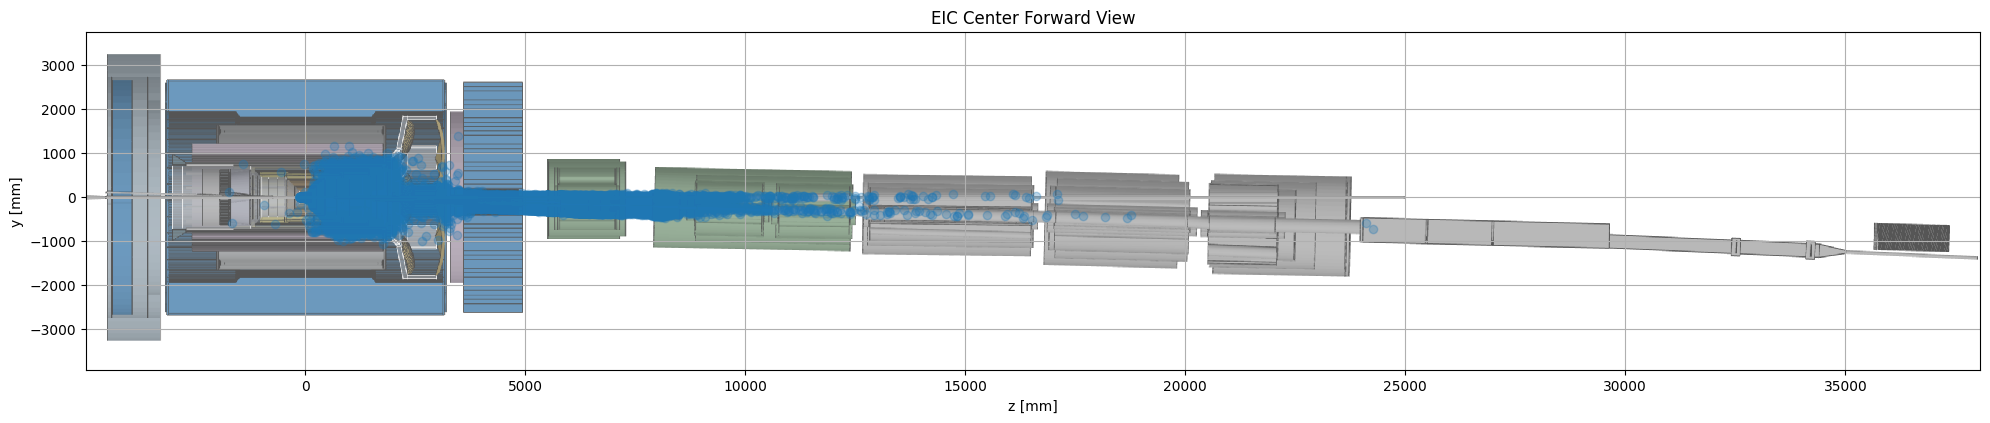

In [7]:
from aa_helpers import create_plot_with_background

fig, ax = create_plot_with_background()
x_axis = df.lam_epz
y_axis = df.lam_epx


# Optional: overlay the reference points to verify alignment
ax.plot(x_axis, y_axis, marker="o", linestyle="none", alpha=0.3)

ax.set_xlabel("z [mm]")
ax.set_ylabel("y [mm]")
ax.set_aspect("equal", adjustable="box")
ax.grid(True)

# Uncomment to lock the view to the image bounds:
# ax.set_xlim(min(left_mm, right_mm), max(left_mm, right_mm))
# ax.set_ylim(min(bottom_mm, top_mm), max(bottom_mm, top_mm))

plt.tight_layout()
plt.show()

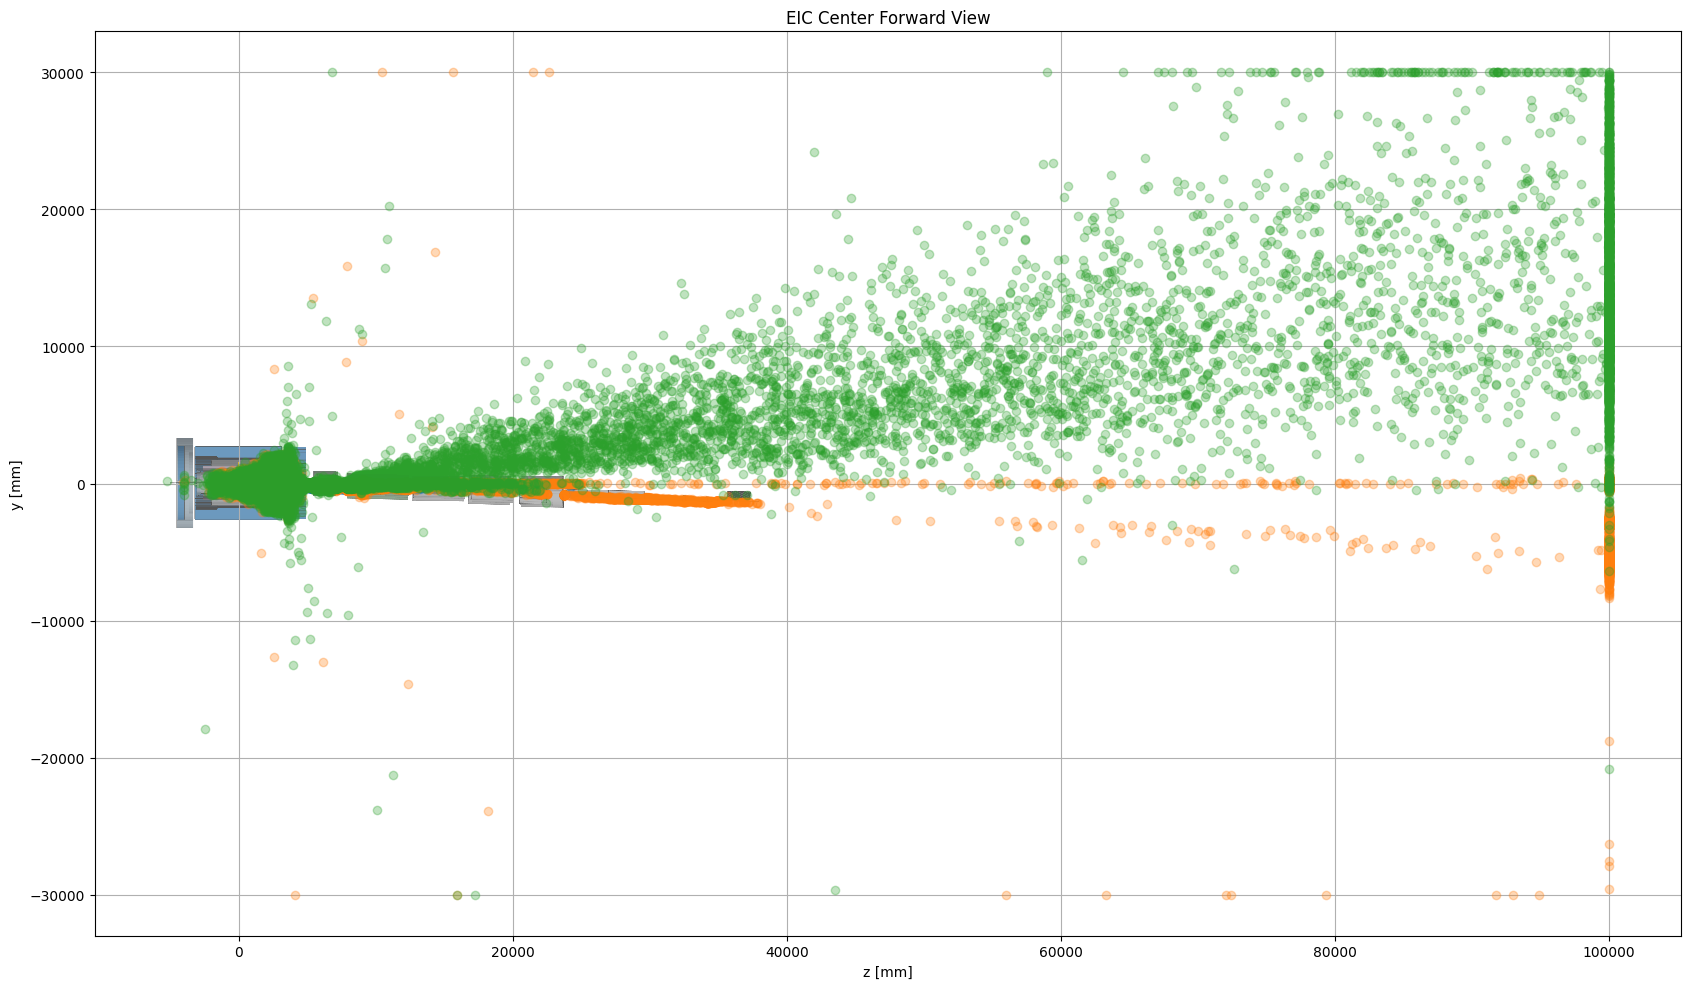

In [9]:
from aa_helpers import create_plot_with_background

fig, ax = create_plot_with_background()

# Optional: overlay the reference points to verify alignment
ax.plot(df.lam_epz, df.lam_epx, marker="o", linestyle="none", alpha=0.3)
ax.plot(df.prot_epz, df.prot_epx, marker="o", linestyle="none", alpha=0.3)
ax.plot(df.pimin_epz, df.pimin_epx, marker="o", linestyle="none", alpha=0.3)

ax.set_xlabel("z [mm]")
ax.set_ylabel("y [mm]")
ax.set_aspect("equal", adjustable="box")
ax.grid(True)

# Uncomment to lock the view to the image bounds:
# ax.set_xlim(min(left_mm, right_mm), max(left_mm, right_mm))
# ax.set_ylim(min(bottom_mm, top_mm), max(bottom_mm, top_mm))

plt.tight_layout()
plt.show()